1. Load The Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


2. Load the Dataset

In [5]:

df = pd.read_csv("emails.csv")
print("Dataset Shape:", df.shape)
print(df.columns)
df.head()

Dataset Shape: (5728, 2)
Index(['text', 'spam'], dtype='object')


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


3. Data Cleaning

In [6]:
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)
print("Missing values:\n", df.isnull().sum())

After removing duplicates: (5695, 2)
Missing values:
 text    0
spam    0
dtype: int64


4.Text Preprocessing

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def clean_email(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w, pos='v') for w in tokens]

    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_email)
df[['text', 'clean_text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,clean_text
0,Subject: naturally irresistible your corporate...,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,subject stock trade gunslinger fanny merrill m...
2,Subject: unbelievable new homes made easy im ...,subject unbelievable new home make easy im wan...
3,Subject: 4 color printing special request add...,subject color print special request additional...
4,"Subject: do not have money , get software cds ...",subject money get software cds software compat...


5. TF-IDF Feature Extraction

In [8]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((4556, 5000), (1139, 5000))

6. Model Training

In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(" Accuracy:", acc)
print("\n Confusion Matrix:\n", cm)
print("\n Classification Report:\n", cr)


 Accuracy: 0.974539069359087

 Confusion Matrix:
 [[840   3]
 [ 26 270]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       843
           1       0.99      0.91      0.95       296

    accuracy                           0.97      1139
   macro avg       0.98      0.95      0.97      1139
weighted avg       0.97      0.97      0.97      1139



7. visualize The Confusion matrix 

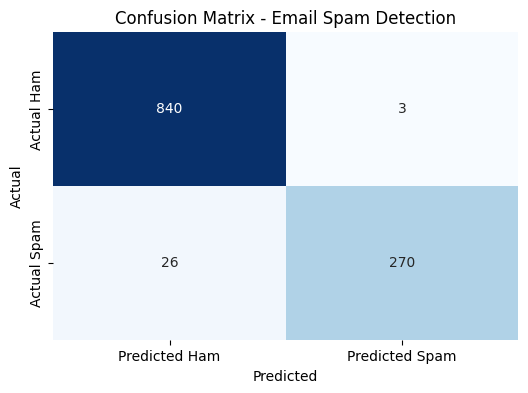

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix - Email Spam Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

8. Customer Email Prediction

In [12]:
def predict_email(text):
    cleaned = clean_email(text)
    vector = tfidf.transform([cleaned]).toarray()
    pred = model.predict(vector)[0]
    print(f"\n Email: {text}")
    print("Prediction →", "SPAM" if pred == 1 else "HAM")


9. Test Examples

In [13]:
predict_email("Congratulations! You've won a free iPhone. Click here to claim now.")
predict_email("Hey Rahul, please find the project report attached.")
predict_email("Claim your $1000 gift card now!")


 Email: Congratulations! You've won a free iPhone. Click here to claim now.
Prediction → SPAM

 Email: Hey Rahul, please find the project report attached.
Prediction → HAM

 Email: Claim your $1000 gift card now!
Prediction → SPAM
